<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/HW7/INSTRUCTIONS_Kaggle_Customer_Profile_DBscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np


In [39]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [40]:
pwd

'/content/gdrive/My Drive/kaggle'

In [47]:
cd /content/drive/MyDrive/kaggle

/content/drive


In [42]:
pwd

'/content/drive/MyDrive/kaggle'

In [ ]:
pip install kaggle

In [ ]:
ls kaggle.json

kaggle.json


first make an account on kaggle and get your kaggle.json file from Account -> Settings. Then put it in a folder on your google drive called `kaggle`


In [ ]:
!chmod 600 kaggle.json #only do it once!

In [12]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
import kaggle


# get info on how to use kaggle datasets to find datasets by name


In [2]:
!kaggle datasets --help

usage: kaggle datasets [-h] {list,files,download,create,version,init,metadata,status} ...

options:
  -h, --help            show this help message and exit

commands:
  {list,files,download,create,version,init,metadata,status}
    list                List available datasets
    files               List dataset files
    download            Download dataset files
    create              Create a new dataset
    version             Create a new dataset version
    init                Initialize metadata file for dataset creation
    metadata            Download metadata about a dataset
    status              Get the creation status for a dataset


# find a file named customer personality analysis

In [ ]:
# prompt: find kaggle datasets with name that contains "customer"

# YOUR CODE HERE

ref                                                      title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ------------------------------------  -----  -------------------  -------------  ---------  ---------------  
imakash3011/customer-personality-analysis                Customer Personality Analysis          62KB  2021-08-22 18:15:05         157150       2541  0.9705882        
blastchar/telco-customer-churn                           Telco Customer Churn                  172KB  2018-02-23 18:20:00         274355       2830  0.88235295       
datascientistanna/customers-dataset                      Shop Customer Data                     23KB  2023-02-07 18:42:21          38424        532  1.0              
vetrirah/customer                                        Customer Segmentation                 105KB  2020-08-28 11:19:39          17788        161  1.0             

In [ ]:
!kaggle datasets download ### YOUR CODE HERE

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download -d imakash3011/customer-personality-analysis


Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 5.04MB/s]


# unpack the file

In [ ]:
!ls

customer-personality-analysis.zip


In [ ]:
!unzip customer-personality-analysis.zip

Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


# read in the file

In [ ]:
# YOUR CODE HERE

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# remove all columns that do not contain numbers (or equivalently select all columns that do)

In [ ]:
#YOUR CODE HERE

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [ ]:
column_length = {c:len(customers[c].unique()) for c in customers.columns}
column_length

{'ID': 2240,
 'Year_Birth': 59,
 'Income': 1975,
 'Kidhome': 3,
 'Teenhome': 3,
 'Recency': 100,
 'MntWines': 776,
 'MntFruits': 158,
 'MntMeatProducts': 558,
 'MntFishProducts': 182,
 'MntSweetProducts': 177,
 'MntGoldProds': 213,
 'NumDealsPurchases': 15,
 'NumWebPurchases': 15,
 'NumCatalogPurchases': 14,
 'NumStorePurchases': 14,
 'NumWebVisitsMonth': 16,
 'AcceptedCmp3': 2,
 'AcceptedCmp4': 2,
 'AcceptedCmp5': 2,
 'AcceptedCmp1': 2,
 'AcceptedCmp2': 2,
 'Complain': 2,
 'Z_CostContact': 1,
 'Z_Revenue': 1,
 'Response': 2}

# remove all columns that have less than 50 unique values (or select all those that have >50)

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,58138.0,58,635,88,546,172,88,88
1,2174,1954,46344.0,38,11,1,6,2,1,6
2,4141,1965,71613.0,26,426,49,127,111,21,42
3,6182,1984,26646.0,26,11,4,20,10,3,5
4,5324,1981,58293.0,94,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,46,709,43,182,42,118,247
2236,4001,1946,64014.0,56,406,0,30,0,0,8
2237,7270,1981,56981.0,91,908,48,217,32,12,24
2238,8235,1956,69245.0,8,428,30,214,80,30,61


# remove the ID which should be a mute index

In [ ]:
# YOUR CODE HERE

In [ ]:
customers

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,58138.0,58,635,88,546,172,88,88
1,1954,46344.0,38,11,1,6,2,1,6
2,1965,71613.0,26,426,49,127,111,21,42
3,1984,26646.0,26,11,4,20,10,3,5
4,1981,58293.0,94,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,46,709,43,182,42,118,247
2236,1946,64014.0,56,406,0,30,0,0,8
2237,1981,56981.0,91,908,48,217,32,12,24
2238,1956,69245.0,8,428,30,214,80,30,61


# create a column that contains the age of the customer, instead of the birth year

In [ ]:
# YOUR CODE HERE

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,age
0,58138.0,58,635,88,546,172,88,88,65
1,46344.0,38,11,1,6,2,1,6,68
2,71613.0,26,426,49,127,111,21,42,57
3,26646.0,26,11,4,20,10,3,5,38
4,58293.0,94,173,43,118,46,27,15,41
...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,55
2236,64014.0,56,406,0,30,0,0,8,76
2237,56981.0,91,908,48,217,32,12,24,41
2238,69245.0,8,428,30,214,80,30,61,66


# scale the data so each feature is mean 0 and standard deviation 1

In [ ]:
# YOUR CODE HERE

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,age
0,0.234063,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.985345
1,-0.234559,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,1.235733
2,0.769478,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,0.317643
3,-1.017239,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-1.268149
4,0.240221,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,-1.017761
...,...,...,...,...,...,...,...,...,...
2235,0.356642,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,0.150717
2236,0.467539,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,1.903435
2237,0.188091,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-1.017761
2238,0.675388,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,1.068807


In [ ]:
#check that each column is mean 0 stdev 1
scaled_customers.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,age
count,2.216000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,4.889791e-17,-3.172066e-18,-7.612958e-17,-2.379049e-17,4.123686e-17,1.506731e-17,-1.506731e-17,-1.110223e-17,-1.681195e-16
std,1.000226e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-2.007250e+00,-1.696001e+00,-9.031668e-01,-6.614492e-01,-7.398135e-01,-6.870680e-01,-6.557331e-01,-8.440457e-01,-2.269702e+00
25%,-6.732620e-01,-8.671566e-01,-8.325919e-01,-6.363012e-01,-6.689119e-01,-6.321399e-01,-6.315032e-01,-6.714858e-01,-6.839101e-01
50%,-3.439972e-02,-3.777284e-03,-3.875991e-01,-4.602650e-01,-4.429132e-01,-4.673554e-01,-4.618937e-01,-3.838859e-01,-9.967091e-02
75%,6.466600e-01,8.596020e-01,5.952483e-01,1.684356e-01,2.882592e-01,2.284015e-01,1.438543e-01,2.296605e-01,8.184192e-01
max,2.441328e+01,1.722981e+00,3.533390e+00,4.343008e+00,6.904261e+00,4.055064e+00,5.716737e+00,6.096698e+00,6.326960e+00


# PLOT HISTOGRAMS OF ALL VARIABLES

In [ ]:
# YOUR CODE HERE

# write a caption for the scatter matrix below

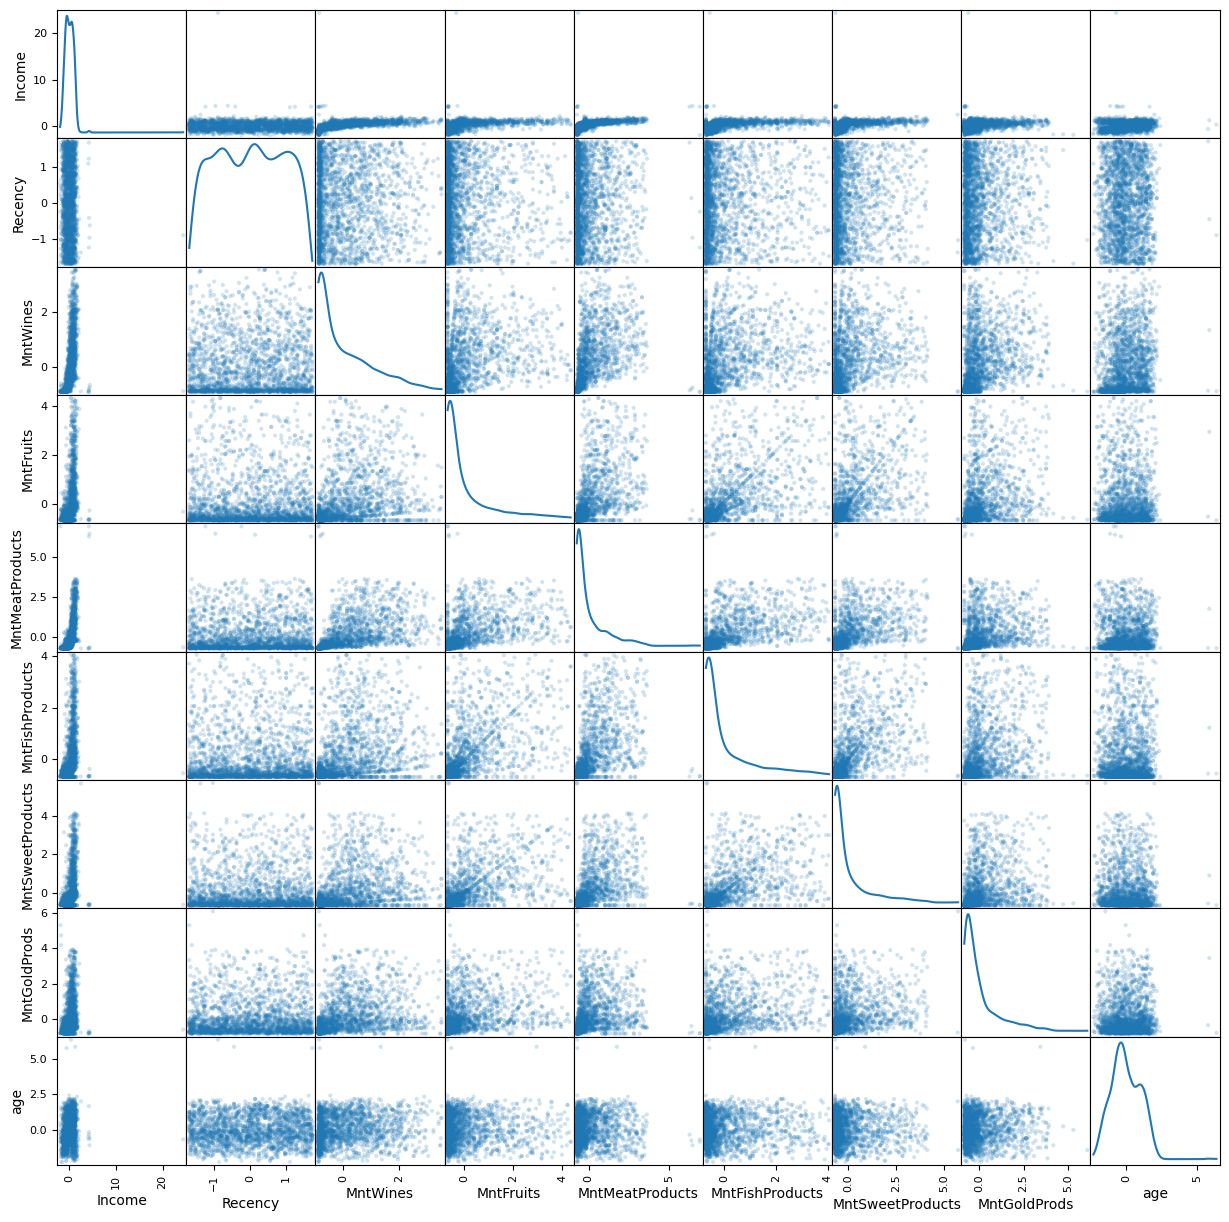

In [ ]:
# prompt: plot a scatter matrix of the scaled dataset

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Assuming 'scaled_customers' DataFrame is already created

# Create a scatter matrix plot
scatter_matrix(scaled_customers, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

# fix NaN by IMPUTING WITH k-NN

In [14]:
# YOUR CODE HERE

In [ ]:
scaled_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            2240 non-null   float64
 1   Recency           2240 non-null   float64
 2   MntWines          2240 non-null   float64
 3   MntFruits         2240 non-null   float64
 4   MntMeatProducts   2240 non-null   float64
 5   MntFishProducts   2240 non-null   float64
 6   MntSweetProducts  2240 non-null   float64
 7   MntGoldProds      2240 non-null   float64
 8   age               2240 non-null   float64
dtypes: float64(9)
memory usage: 157.6 KB


# CLUSTER THE DATA WITH DB SCAN, THEN SEE HOW MANY CLUSTERS THERE ARE AND HOW MANY OBJECTS IN EACH CLUSTER (your result may differe from mine!)

In [15]:
# YOUR CODE HERE

<Figure size 800x600 with 0 Axes>

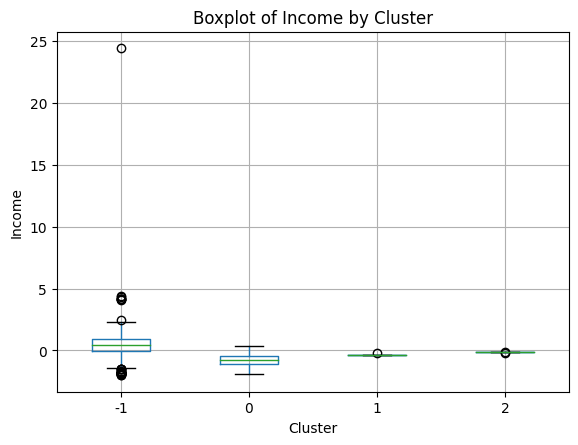

<Figure size 800x600 with 0 Axes>

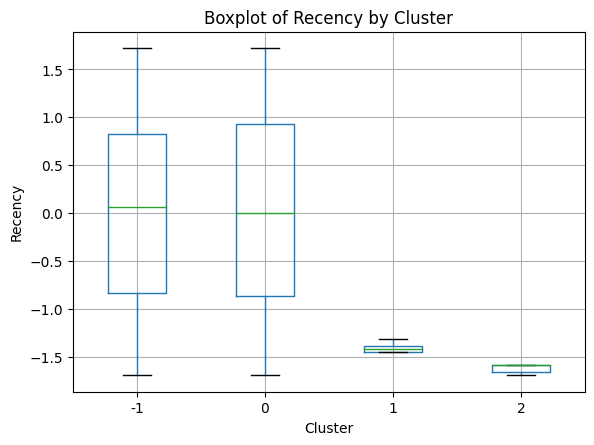

<Figure size 800x600 with 0 Axes>

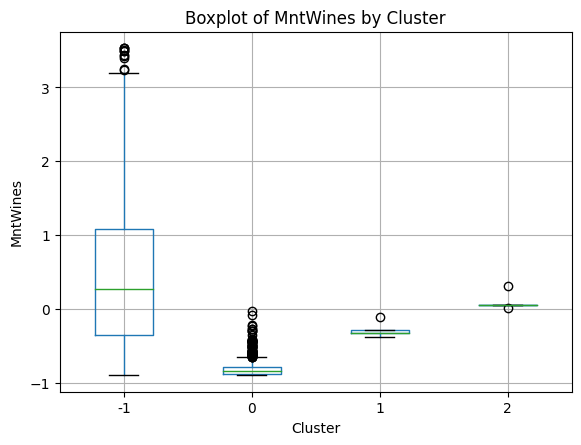

<Figure size 800x600 with 0 Axes>

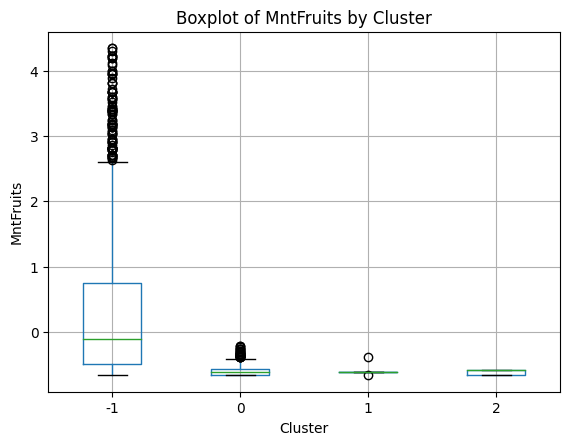

<Figure size 800x600 with 0 Axes>

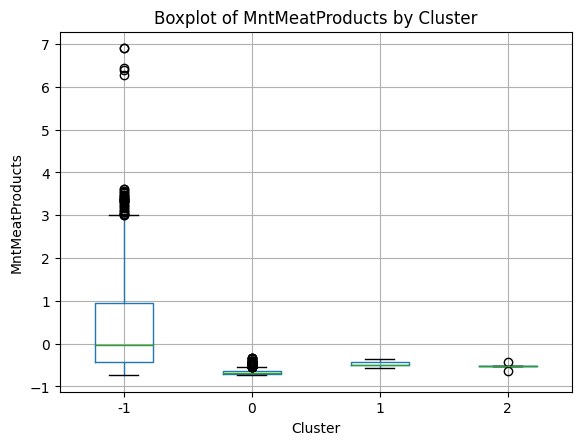

<Figure size 800x600 with 0 Axes>

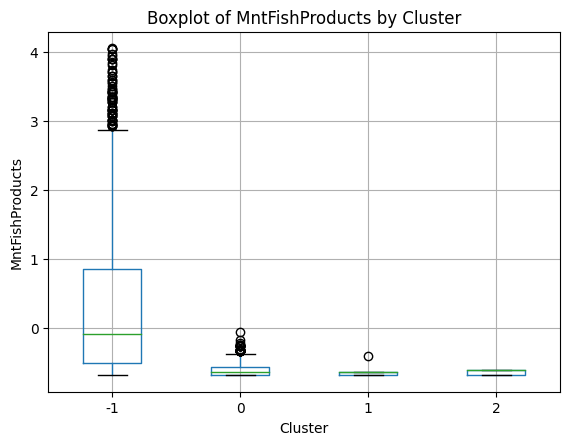

<Figure size 800x600 with 0 Axes>

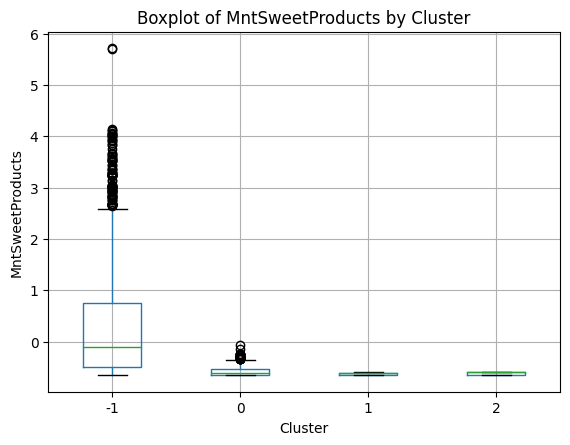

<Figure size 800x600 with 0 Axes>

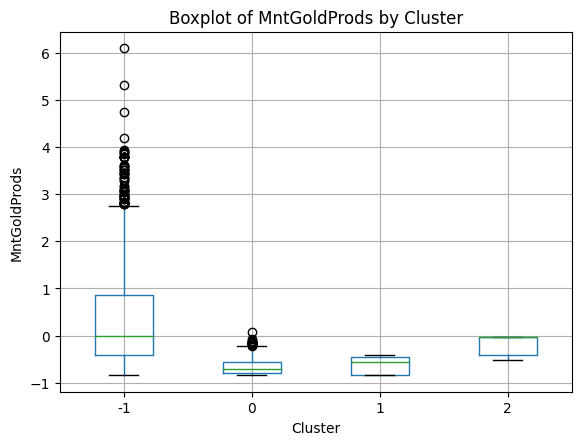

<Figure size 800x600 with 0 Axes>

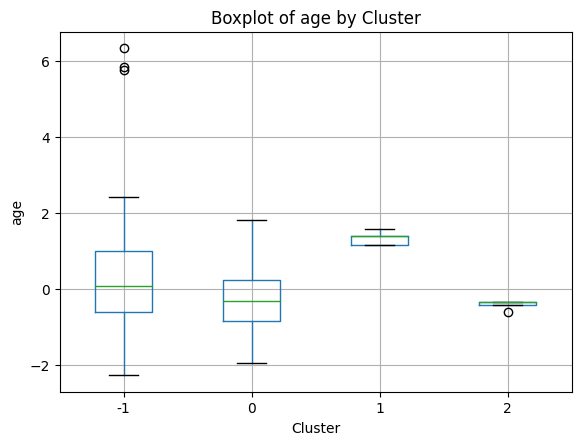

<Figure size 800x600 with 0 Axes>

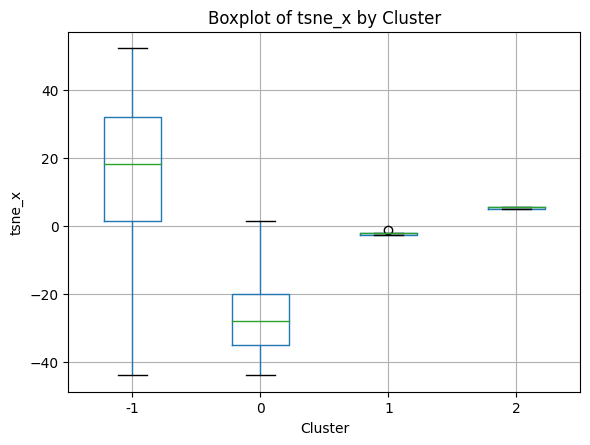

<Figure size 800x600 with 0 Axes>

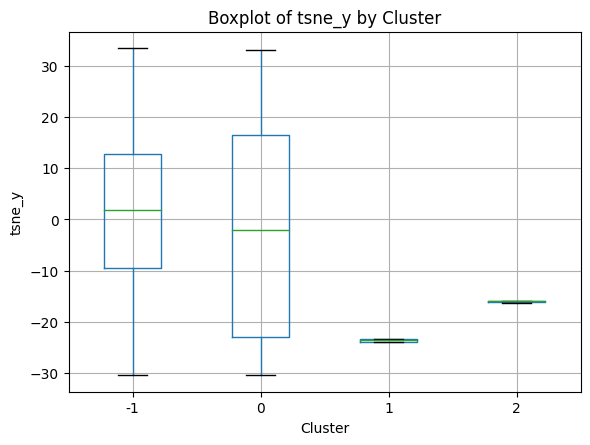

In [ ]:
# Keep this code to plot the outcome of the clusteing
import matplotlib.pyplot as plt

# Assuming 'scaled_customers' DataFrame and 'clusters' are already created

# Create a box and whiskers plot for each cluster
for column in scaled_customers.columns:
  if column != 'cluster':  # Exclude the cluster column itself
    plt.figure(figsize=(8, 6))
    scaled_customers.boxplot(column=column, by='cluster')
    plt.title(f'Boxplot of {column} by Cluster')
    plt.suptitle('')  # Remove the default suptitle
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

# ADD A CAPTION

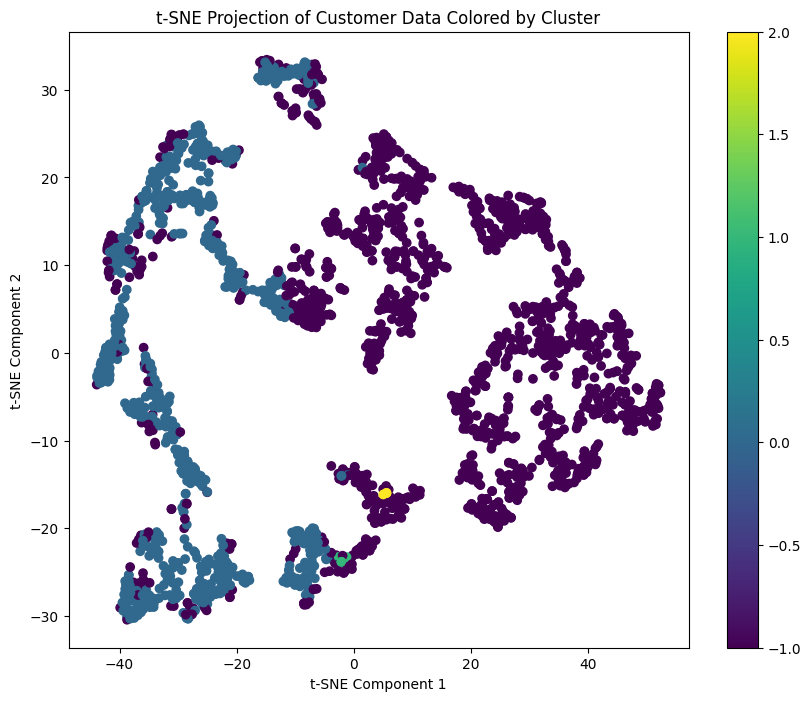

In [ ]:
# prompt: produce a tsne 2d projection of scaled_data and plot it colored by cluster

from sklearn.manifold import TSNE

# Assuming 'scaled_customers' DataFrame with 'cluster' column is already created

# Create a t-SNE object
tsne = TSNE(n_components=2, random_state=42, early_exaggeration=15, perplexity=50)

# Fit and transform the scaled data to reduce it to 2 dimensions
tsne_results = tsne.fit_transform(scaled_customers.drop('cluster', axis=1))

# Add the t-SNE results to the DataFrame
scaled_customers['tsne_x'] = tsne_results[:, 0]
scaled_customers['tsne_y'] = tsne_results[:, 1]

# Plot the t-SNE projection, colored by cluster
plt.figure(figsize=(10, 8))
plt.scatter(scaled_customers['tsne_x'], scaled_customers['tsne_y'], c=scaled_customers['cluster'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Customer Data Colored by Cluster')
plt.colorbar()
plt.show()

# ADD A CAPTION